# Credit Risk Analysis

En este notebook vamos a analizar un dataset de créditos y vamos a intentar predecir si un cliente es un buen o mal pagador. Para ello vamos a utilizar un dataset de Kaggle que contiene información sobre créditos de un banco. link: https://www.kaggle.com/datasets/ranadeep/credit-risk-dataset

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.discriminant_analysis import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
from imblearn import keras
from sklearn.utils.class_weight import compute_class_weight
import keras.backend as K

from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTEENN
from datetime import datetime
import joblib

## Exploración inicial de los datos

In [ ]:
#Cargar el dataset
df = pd.read_csv('./loan/loan.csv')

C:\Users\Juan Esteban\AppData\Local\Temp\ipykernel_14632\1590592134.py:2: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./loan/loan.csv')


In [ ]:
#Verificar los datos
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Verificar las columnas y los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [ ]:
#Describir los datos
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


In [ ]:
#Verificar los valores nulos
df.isnull().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
all_util            866007
total_rev_hi_lim     70276
inq_fi              866007
total_cu_tl         866007
inq_last_12m        866007
Length: 74, dtype: int64

Se observa que hay algunas variables que tienen valores nulos, por lo que se procederá a realizar un análisis más detallado de los datos para determinar cómo se deben tratar estos valores nulos.

## Preprocesamiento de los datos

Primero vamos a remover las columnas que no tienen relevancia para el análisis de riesgo crediticio. Luego, vamos a rellenar los valores nulos de las columnas que consideramos importantes para el análisis.

In [ ]:
data = df.copy()# Copiar el dataset

def clean_data(data: pd.DataFrame) -> pd.DataFrame:

    # Paso 1: Remover columnas no relevantes para el estudio

    data.drop(columns = ['id', 'member_id', 'emp_title','funded_amnt','funded_amnt_inv','last_pymnt_amnt','last_pymnt_d',
                         'loan_amnt','int_rate' ,'url', 'desc', 'title','last_credit_pull_d','last_pymnt_d',
                            'zip_code','issue_d', 'next_pymnt_d','addr_state','next_pymnt_d'], inplace = True)

    # Paso 2: Remover columnas con el 80% de valores faltantes

    data.dropna(thresh = data.shape[0]*0.8, axis = 1, inplace = True)

    # Paso 3: Convertir a numerica la columna 'term'
    data['term'] = pd.to_numeric(df['term'].str.replace(' months', ''))

    # Paso 4: Convertir a numerica la columna 'emp_length'

    data['emp_length'] = data['emp_length'].str.replace('+ years', '')
    data['emp_length'] = data['emp_length'].str.replace('< 1 year', str(0))
    data['emp_length'] = data['emp_length'].str.replace(' years', '')
    data['emp_length'] = data['emp_length'].str.replace(' year', '')

    data['emp_length'] = pd.to_numeric(data['emp_length'])
    data['emp_length'].fillna(value = 0, inplace = True)


    return data

data_cleaned = clean_data(data)


C:\Users\Juan Esteban\AppData\Local\Temp\ipykernel_14632\1033093427.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['emp_length'].fillna(value = 0, inplace = True)


In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 37 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   term                        887379 non-null  int64  
 1   installment                 887379 non-null  float64
 2   grade                       887379 non-null  object 
 3   sub_grade                   887379 non-null  object 
 4   emp_length                  887379 non-null  float64
 5   home_ownership              887379 non-null  object 
 6   annual_inc                  887375 non-null  float64
 7   verification_status         887379 non-null  object 
 8   loan_status                 887379 non-null  object 
 9   pymnt_plan                  887379 non-null  object 
 10  purpose                     887379 non-null  object 
 11  dti                         887379 non-null  float64
 12  delinq_2yrs                 887350 non-null  float64
 13  earliest_cr_li

Se manejarán los valores nulos según el tipo de variable.


In [ ]:
data = data_cleaned.copy()

def handle_nulls_by_type(dataFrame: pd.DataFrame) -> pd.DataFrame:

    monetary_cols = [
    'installment','revol_bal','revol_util', 'out_prncp', 'out_prncp_inv',
    'total_pymnt', 'total_pymnt_inv', 'total_rec_int',
    'tot_coll_amt', 'tot_cur_bal','total_rev_hi_lim'
    ]

    # Usar mediana para variables monetarias
    monetary_imputer = SimpleImputer(strategy='median')
    dataFrame[monetary_cols] = monetary_imputer.fit_transform(dataFrame[monetary_cols])

    #Variables de conteo
    count_cols = [
        'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc',
        'collections_12_mths_ex_med', 'acc_now_delinq'
    ]

    # Para variables de conteo, usar 0 o la mediana según el caso
    for col in count_cols:
        if col in ['collections_12_mths_ex_med', 'acc_now_delinq']:
            # Para colecciones y delinquencias, usar 0
            dataFrame[col] = dataFrame[col].fillna(dataFrame[col].median())
        else:
            # Para otros conteos, usar la mediana
            dataFrame[col] = dataFrame[col].fillna(dataFrame[col].median())

    # Para 'delinq_2yrs' usar mediana y redondeo a entero

    dataFrame['delinq_2yrs'] = dataFrame['delinq_2yrs'].fillna(dataFrame['delinq_2yrs'].median())

    #Variables de conteo

    count_cols = [
        'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc',
        'collections_12_mths_ex_med', 'acc_now_delinq'
    ]

    for col in count_cols:
        if col in ['collections_12_mths_ex_med', 'acc_now_delinq']:
            # Para colecciones y delinquencias, usar 0
            dataFrame[col] = dataFrame[col].fillna(0)
        else:
            # Para otros conteos, usar la mediana
            dataFrame[col] = dataFrame[col].fillna(dataFrame[col].median())



    return dataFrame

data_withoutNulls = handle_nulls_by_type(data)


In [ ]:

# Convertir a formato de fecha
data_withoutNulls['earliest_cr_line'] = pd.to_datetime(data_withoutNulls['earliest_cr_line'], format='%b-%Y', errors='coerce')

# Definir la fecha de referencia (2025)
reference_date = datetime(2025, 1, 1)

# Calcular la diferencia en meses manualmente
def months_until_2025(date):
    if pd.isnull(date):  # Manejar valores nulos
        return 0
    return (reference_date.year - date.year) * 12 + (reference_date.month - date.month)

# Aplicar la función a la columna
data_withoutNulls['months_until_2025'] = data_withoutNulls['earliest_cr_line'].apply(months_until_2025)
data_withoutNulls.drop(columns = ['earliest_cr_line'], inplace = True)
data_withoutNulls['months_until_2025'] = data_withoutNulls['months_until_2025'].fillna(0).astype(int)
print(data_withoutNulls['months_until_2025'])

data_withoutNulls['annual_inc'] = data_withoutNulls['annual_inc'].fillna(0).astype(int)


0         480
1         309
2         278
3         347
4         348
         ... 
887374    244
887375    610
887376    256
887377    255
887378    277
Name: months_until_2025, Length: 887379, dtype: int64


In [ ]:
# Ver variables categoricas y sus valores unicos

data.select_dtypes(include = 'object').nunique()


grade                   7
sub_grade              35
home_ownership          6
verification_status     3
loan_status            10
pymnt_plan              2
purpose                14
initial_list_status     2
application_type        2
dtype: int64

In [ ]:
#Verificamos que si se hayan eliminado los valores nulos
data_withoutNulls.isna().sum()

term                          0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
pymnt_plan                    0
purpose                       0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
collections_12_mths_ex_med    0
policy_code                   0
applicat

## Análisis descriptivo

In [ ]:
#Guardamos el archivo limpio
data_withoutNulls.to_csv('loan_cleaned.csv', index=False)

In [ ]:
#Cargo el dataset limpio
data_frame= pd.read_csv('loan_cleaned.csv')

In [ ]:
#Creo una copia del dataset limpio
data_cleaned = data_frame.copy()

En primer lugar, vamos a analizar la variable objetivo, que en este caso es *loan_status*. Esta variable indica el estado del préstamo y consta de 10 clases diferentes, como se puede observar a continuación

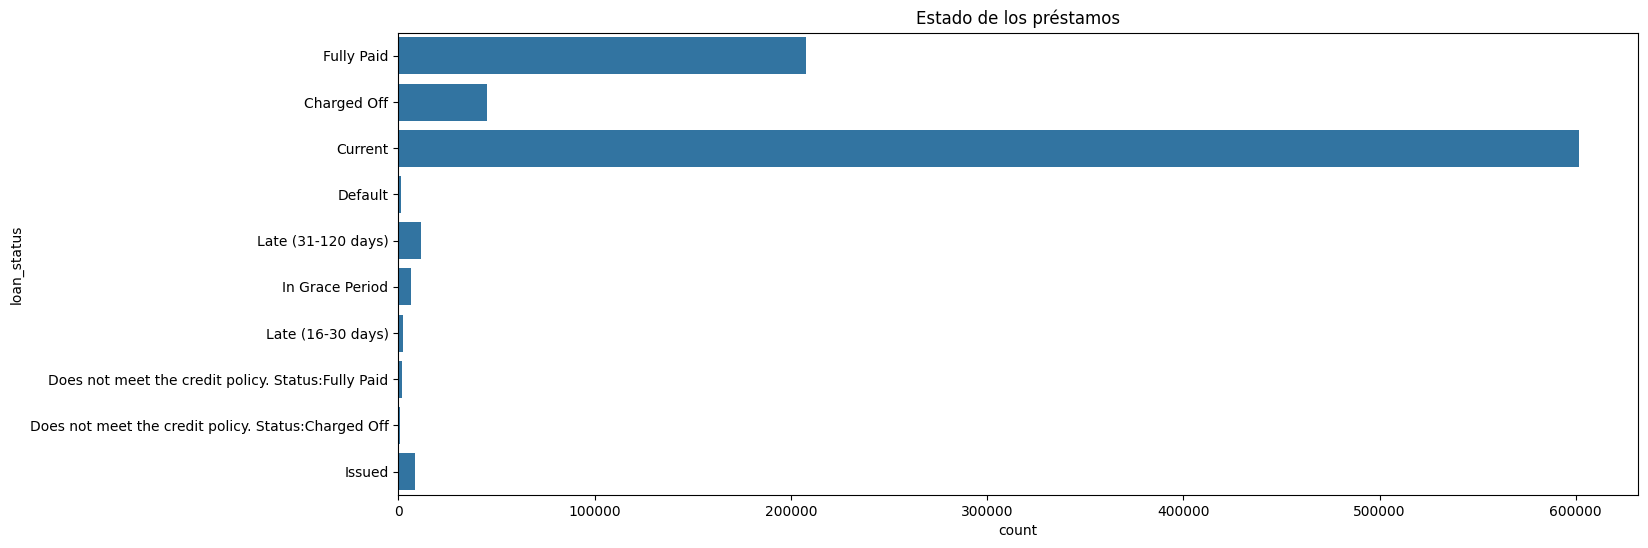

In [ ]:
#Gráfica de barras de la variable loan_status

# Definir el tamaño de la gráfica
plt.figure(figsize=(16, 6))
# Crear la gráfica
sns.countplot(y='loan_status', data=data_cleaned)
# Añadir título
plt.title("Estado de los préstamos")

plt.show()

Se observa que la variable `loan_status` tiene varios estados, siendo los más relevantes los siguientes:
- Current: El préstamo está al día y en curso.
- Fully Paid: El préstamo ha sido pagado en su totalidad.
- charged Off: El préstamo no ha sido pagado y se considera una pérdida.

Estos estados indican que la mayoría de los préstamos están al día o han sido pagados, mientras que una pequeña proporción ha sido incumplida.


### Análisis de variables y relaciones con la variable objetivo

#### Tasa de interés (int_rate) y estado del préstamo (loan_status)

C:\Users\Juan Esteban\AppData\Local\Temp\ipykernel_12908\3075842697.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='int_rate', y='loan_status', data=data_cleaned, palette='Set2')


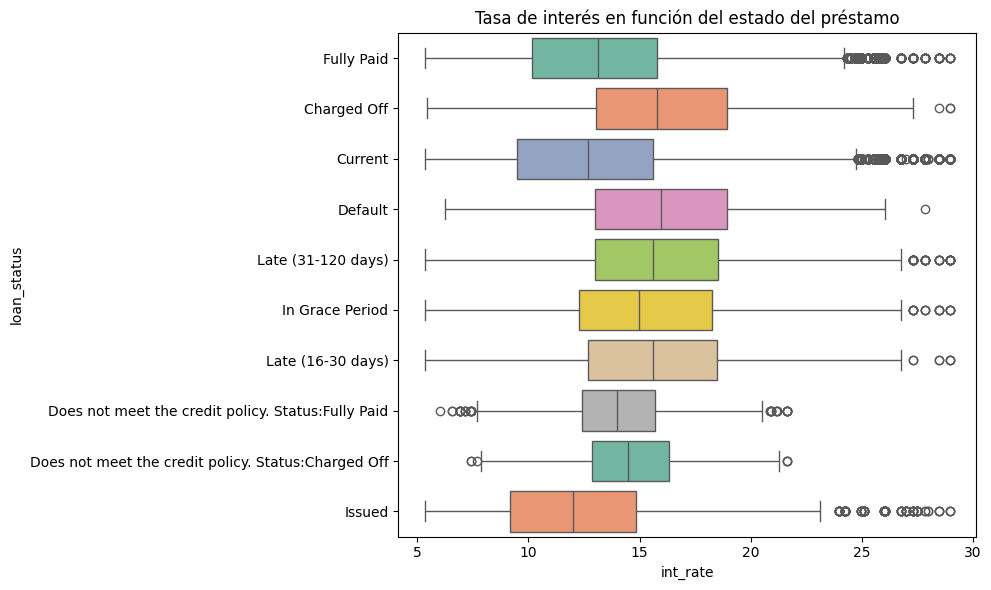

In [ ]:
#Box plot de la variable int_rate en función de la variable loan_status

# Definir el tamaño de la gráfica
plt.figure(figsize=(10, 6))
# Crear la gráfica
sns.boxplot(x='int_rate', y='loan_status', data=data_cleaned, palette='Set2')
# Añadir título
plt.title("Tasa de interés en función del estado del préstamo")
# Ajustar márgenes
plt.tight_layout()

El gráfico muestra que las tasas de interés son más altas en préstamos con mayor riesgo, como los estados "Default" y "Charged Off", mientras que son más bajas en los "Fully Paid". Los estados de incumplimiento parcial ("Late") también tienen tasas altas, pero no tanto como los de incumplimiento total. Esto refleja que el riesgo del préstamo influye directamente en las tasas de interés.

#### Propósito del préstamo (purpose) y estado del préstamo (loan_status)

<Figure size 1000x800 with 0 Axes>

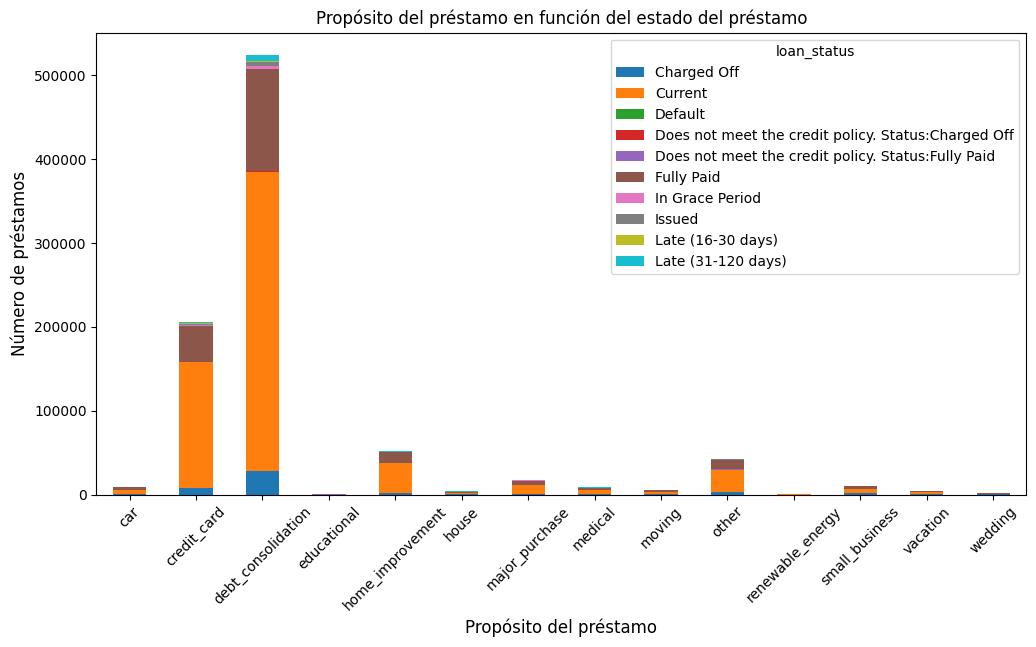

In [ ]:
#Grafico de barras de purpose en función de loan_status
plt.figure(figsize=(10, 8))

# Crear la gráfica
purpose = data_cleaned.groupby(['purpose', 'loan_status']).size().unstack(fill_value=0)
purpose.plot(kind='bar', stacked=True, figsize=(12, 6))
# Añadir título
plt.title("Propósito del préstamo en función del estado del préstamo")


plt.xlabel('Propósito del préstamo', fontsize=12)
plt.ylabel('Número de préstamos', fontsize=12)
plt.xticks(rotation=45)

plt.show()


Este gráfico sugiere que una proporción significativa de los préstamos se destina a la consolidación de deudas o al pago de tarjetas de crédito.

#### Grado del préstamo (grade) y estado del préstamo (loan_status)

Text(0.5, 1.0, 'Grado del préstamo en función del estado del préstamo')

<Figure size 1000x800 with 0 Axes>

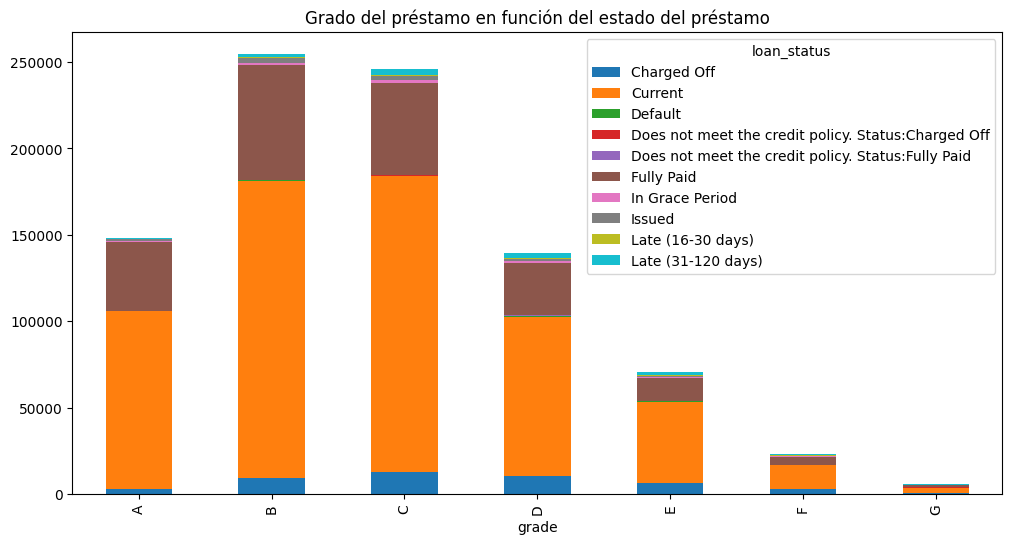

In [ ]:
#Grafico de barras de grade en función de loan_status
plt.figure(figsize=(10, 8))

# Crear la gráfica
grade = data_cleaned.groupby(['grade', 'loan_status']).size().unstack(fill_value=0)

grade.plot(kind='bar', stacked=True, figsize=(12, 6))

# Añadir título
plt.title("Grado del préstamo en función del estado del préstamo")


Aunque la visualización puede resultar un poco compleja, se logra evidenciar que en los grados C, D y E existe una mayor proporción de estados negativos, como "Charged Off", "Default" o "Late". Esto se debe a que estos grados representan un mayor riesgo crediticio, lo que incrementa la probabilidad de incumplimiento o mora en los préstamos.

#### Monto del préstamo (loan_amnt) y estado del préstamo (loan_status)

C:\Users\Juan Esteban\AppData\Local\Temp\ipykernel_6896\2217513357.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_amnt', y='loan_status', data=data_cleaned, palette='Set2')


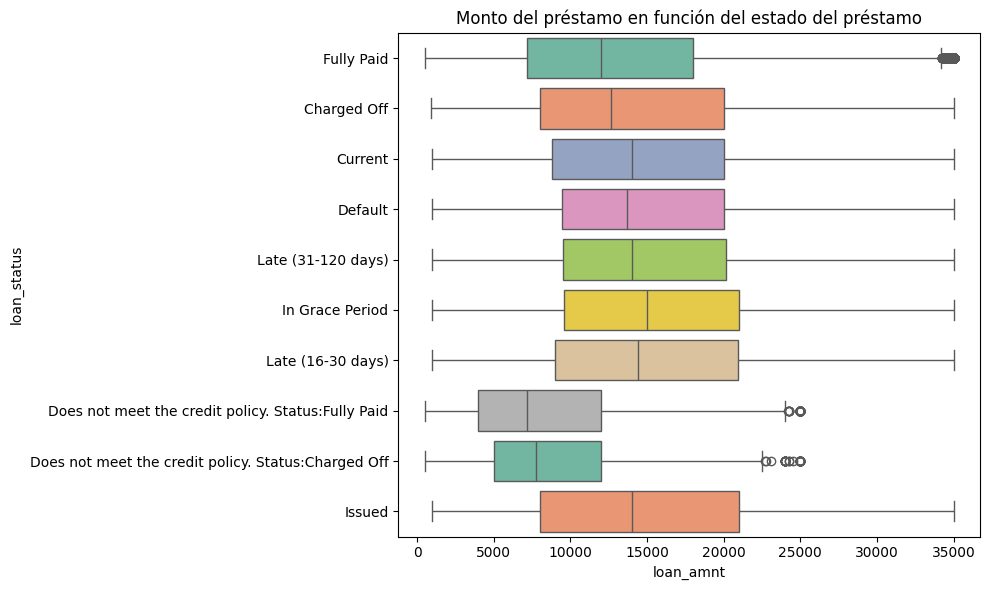

In [ ]:
#Box plot de la variable load_amaunt en función de la variable loan_status

# Definir el tamaño de la gráfica
plt.figure(figsize=(10, 6))
# Crear la gráfica
sns.boxplot(x='loan_amnt', y='loan_status', data=data_cleaned, palette='Set2')
# Añadir título
plt.title("Monto del préstamo en función del estado del préstamo")
# Ajustar márgenes
plt.tight_layout()

### Agrupamiento de variable objetivo

Las **clases** se agruparon en 5, de la siguiente manera:

1. **Préstamos activos o en curso:**
    - **Current**
    - **In Grace Period**
    
    Estos préstamos están activos y en proceso, ya sea dentro de su período normal o con una prórroga.
    
2. **Préstamos pagados:**
    - **Fully Paid**
    - **Does not meet the credit policy. Status: Fully Paid**
    
    Estos préstamos han sido pagados en su totalidad, aunque uno de ellos está relacionado con una situación en la que no se cumplen los requisitos de la política de crédito.
    
3. **Préstamos morosos:**
    - **Late (16-30 days)**
    - **Late (31-120 days)**
    
    Estos préstamos están en estado de atraso, con pagos pendientes por un período específico.
    
4. **Préstamos incumplidos:**
    - **Default**
    - **Charged Off**
    - **Does not meet the credit policy. Status: Charged Off**
    
    Estos préstamos están marcados como incumplidos, ya sea por no cumplir con los pagos o por no cumplir con los términos de la política de crédito.
    
5. **Préstamos emitidos:**
    - **Issued**
    
    Estos son préstamos que han sido emitidos pero no han sido clasificados en ninguna otra categoría específica, como "actual" o "pagado".

In [ ]:
X = data_cleaned.drop(columns = 'loan_status')
y = data_cleaned['loan_status']

## Modelado de datos

Dividimos los datos en conjuntos de entrenamiento y prueba.

In [ ]:
#Dividimos los datos en train, test y validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

### Codificación de variables categóricas

#### One-Hot Encoding para variables categóricas

In [ ]:
#One hot encoding para las variables categóricas
one_hot = OneHotEncoder(sparse_output=False, drop='first')
X_train_encoded_one = pd.DataFrame(one_hot.fit_transform(X_train[['home_ownership','initial_list_status','application_type','purpose']]),
                                             columns = one_hot.get_feature_names_out(['home_ownership','initial_list_status', 'application_type','purpose']))

X_val_encoded_one = pd.DataFrame(one_hot.transform(X_val[['home_ownership','initial_list_status','application_type' ,'purpose']]),
                                                columns = one_hot.get_feature_names_out(['home_ownership','initial_list_status', 'application_type','purpose']))

X_train_encoded_one.index = X_train.index
X_val_encoded_one.index = X_val.index


In [ ]:
X_train_encoded_one.info()

<class 'pandas.core.frame.DataFrame'>
Index: 665534 entries, 624453 to 573734
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   home_ownership_MORTGAGE     665534 non-null  float64
 1   home_ownership_NONE         665534 non-null  float64
 2   home_ownership_OTHER        665534 non-null  float64
 3   home_ownership_OWN          665534 non-null  float64
 4   home_ownership_RENT         665534 non-null  float64
 5   initial_list_status_w       665534 non-null  float64
 6   application_type_JOINT      665534 non-null  float64
 7   purpose_credit_card         665534 non-null  float64
 8   purpose_debt_consolidation  665534 non-null  float64
 9   purpose_educational         665534 non-null  float64
 10  purpose_home_improvement    665534 non-null  float64
 11  purpose_house               665534 non-null  float64
 12  purpose_major_purchase      665534 non-null  float64
 13  purpose_medica

#### Ordinal Encoding para variables categóricas

In [ ]:
#Usamos OrdinalEncoder para las variables categóricas

ordinal = OrdinalEncoder()

orden = [
    ['Not Verified', 'Source Verified', 'Verified'],
    ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
    ['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
    'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5',
    'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
    'G1', 'G2', 'G3', 'G4', 'G5']]

X_train_encoded_ord = pd.DataFrame(ordinal.fit_transform(X_train[['verification_status','grade','sub_grade']]),
                                                columns = ['verification_status','grade','sub_grade'])

X_val_encoded_ord = pd.DataFrame(ordinal.transform(X_val[['verification_status','grade','sub_grade']]),
                                                columns = ['verification_status','grade','sub_grade'])

X_train_encoded_ord.index = X_train.index
X_val_encoded_ord.index = X_val.index


#### Label Encoding para variables categóricas

In [ ]:
#Usamos LabelEncoder para la variable pymnt_plan


label = LabelEncoder()

X_train_encoded_label = pd.DataFrame(label.fit_transform(X_train['pymnt_plan']), columns = ['pymnt_plan'])
X_val_encoded_label = pd.DataFrame(label.transform(X_val['pymnt_plan']), columns = ['pymnt_plan'])


X_train_encoded_label.index = X_train.index
X_val_encoded_label.index = X_val.index

Se eliminan las columnas originales y se concatenan las columnas codificadas.

In [ ]:
#Eliminamos las columnas originales

X_train.drop(columns = ['home_ownership','initial_list_status','application_type','verification_status','grade','sub_grade','pymnt_plan','purpose'], inplace = True)
X_val.drop(columns = ['home_ownership','initial_list_status','application_type','verification_status','grade','sub_grade','pymnt_plan','purpose'], inplace = True)

#Unimos los datos codificados con los datos originales

X_train = pd.concat([X_train, X_train_encoded_one, X_train_encoded_ord, X_train_encoded_label], axis = 1)
X_val = pd.concat([X_val, X_val_encoded_one, X_val_encoded_ord, X_val_encoded_label], axis = 1)



In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 665534 entries, 624453 to 573734
Data columns (total 52 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   term                        665534 non-null  int64  
 1   installment                 665534 non-null  float64
 2   emp_length                  665534 non-null  float64
 3   annual_inc                  665534 non-null  int64  
 4   dti                         665534 non-null  float64
 5   delinq_2yrs                 665534 non-null  float64
 6   inq_last_6mths              665534 non-null  float64
 7   open_acc                    665534 non-null  float64
 8   pub_rec                     665534 non-null  float64
 9   revol_bal                   665534 non-null  float64
 10  revol_util                  665534 non-null  float64
 11  total_acc                   665534 non-null  float64
 12  out_prncp                   665534 non-null  float64
 13  out_prncp_inv 

## Selección de características

Para seleccionar las características más importantes, se utiliza el método de Random Forest.

In [ ]:

# Label Encoding
label_encoder = LabelEncoder()
label_encoder.fit(y_train)  # Ajustar solo con train

y_train= label_encoder.transform(y_train)
y_val= label_encoder.transform(y_val)


In [ ]:
#Vamos a usar Random Forest para determinar la importancia de las variables
randomForest = RandomForestClassifier(n_estimators=300, random_state=42)
randomForest.fit(X_train, y_train)
importances = randomForest.feature_importances_
features = X_train.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
importance_df.head(20)

,Feature,Importance
12,out_prncp,0.281985
13,out_prncp_inv,0.261656
16,total_rec_prncp,0.100320
14,total_pymnt,0.055383
15,total_pymnt_inv,0.045496
1,installment,0.040087
19,recoveries,0.035747
17,total_rec_int,0.029362
20,collection_recovery_fee,0.025245
26,total_rev_hi_lim,0.013148


Se seleccionan las 20 características más importantes.

In [ ]:
#Seleccionamos las 20 variables más importantes

X_train = X_train[importance_df['Feature'][:20]]
X_val = X_val[importance_df['Feature'][:20]]


In [ ]:
#Escalamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [ ]:
#Guardamos el escalador
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

## Construcción de modelos

Construimos nuestro modelo principal, que es una red neuronal con 3 capas ocultas, batch normalization y dropout.

In [ ]:
#Creamos el modelo
from tensorflow.keras import models, layers, regularizers
def create_model(num_classes, input_dim):
    """
    Modelo de red neuronal
    """
    model = models.Sequential([
        layers.InputLayer(input_shape=(input_dim,)),

        # Primera capa densa
        layers.Dense(256, kernel_regularizer=regularizers.l2(0.001)),
        layers.Activation('relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        # Segunda capa densa
        layers.Dense(128, kernel_regularizer=regularizers.l2(0.001)),
        layers.Activation('relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),

        # Tercera capa densa
        layers.Dense(64,  kernel_regularizer=regularizers.l2(0.001)),
        layers.Activation('relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.1),

        # Capa de salida
        layers.Dense(num_classes, activation='softmax')
    ])


    return model

Creamos una función para evaluar el modelo.

In [ ]:
#Función para entrenar el modelo
def train_model(model, x_train, y_train, x_val, y_val, epochs=100, batch_size=32, patience=10, class_weight_dict=None,class_weights=None):
    """
    Entrenar el modelo de red neuronal
    """
    # Obtener número de clases únicas
    n_classes = len(tf.unique(tf.cast(y_train, tf.int64))[0])
    print(n_classes)


    optimizer = tf.keras.optimizers.Adam(
    # learning_rate=lr_schedule,
    learning_rate=1e-4,
    clipnorm=1.0
    )

    # Función de pérdida focal
    def focal_loss(gamma=2.0):
        def loss_fn(y_true, y_pred):
            y_true = tf.cast(y_true, tf.int32)
            y_true = tf.one_hot(y_true, depth=10)

            cross_entropy = -y_true * tf.math.log(y_pred + K.epsilon())
            weight = tf.pow(1 - y_pred, gamma) * y_true

            return tf.reduce_mean(weight * cross_entropy)
        return loss_fn

    #Función de pérdida ponderada
    def weighted_categorical_crossentropy(class_weights):
        def loss(y_true, y_pred):
            y_true = tf.cast(y_true, tf.int32)
            weights = tf.gather(class_weights, y_true)
            return tf.losses.sparse_categorical_crossentropy(y_true, y_pred) * weights
        return loss


    # Compilar el modelo con la métrica F1
    model.compile(
        optimizer=optimizer,
        loss=focal_loss(),
        # loss=weighted_categorical_crossentropy(tf.constant(class_weights, dtype=tf.float32)),
        # loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # Callbacks
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-5,
        verbose=1,
    )

    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=patience,
        restore_best_weights=True,
        verbose=1
    )

    # Entrenamiento
    history = model.fit(
        x_train, y_train,
        validation_data=(x_val, y_val),
        class_weight=class_weight_dict,
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[reduce_lr, early_stopping]
    )

    return history

Calculamos los pesos de clase para manejar el desequilibrio de clases.

In [ ]:
class_weights = compute_class_weight(
class_weight='balanced',
classes=np.unique(y_train),
y=y_train)
class_weight_dict = dict(enumerate(class_weights))

Entrenamos el modelo con los datos de entrenamiento. Con 100 épocas y un tamaño de lote de 256.

In [ ]:
model = create_model(num_classes=10, input_dim=X_train.shape[1])

# Entrenar el modelo

history = train_model(model,X_train_scaled, y_train, X_val_scaled, y_val, epochs=100, batch_size=256, patience=5, class_weight_dict=class_weight_dict, class_weights=class_weights)

b:\Juan Esteban\Documentos\RNA\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10
Epoch 1/100
2600/2600 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7583 - loss: 0.2852 - val_accuracy: 0.9486 - val_loss: 0.0621 - learning_rate: 1.0000e-04
Epoch 2/100
2600/2600 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9418 - loss: 0.0476 - val_accuracy: 0.9560 - val_loss: 0.0183 - learning_rate: 1.0000e-04
Epoch 3/100
2600/2600 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9497 - loss: 0.0176 - val_accuracy: 0.9590 - val_loss: 0.0111 - learning_rate: 1.0000e-04
Epoch 4/100
2600/2600 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9560 - loss: 0.0119 - val_accuracy: 0.9610 - val_loss: 0.0094 - learning_rate: 1.0000e-04
Epoch 5/100
2600/2600 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9581 - loss: 0.0103 - val_accuracy: 0.9612 - val_loss: 0.0087 - learning_rate: 1.0000e-04
Epoch 6/100
2600/2600 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9590 - loss: 0.0098 - val_accuracy: 0.9619 - val_loss: 0.0085 - learning_rate: 1.0000e-04
Epoch 7/100
2600/2600 ━━━━━━━━━━━━━━━━━━━━

Creamos una función para graficar el historial de entrenamiento.

In [ ]:

def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'] , label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()


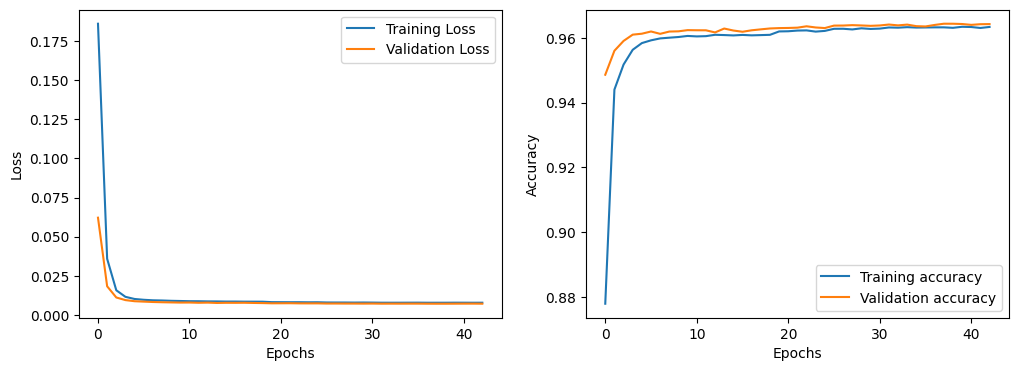

In [ ]:
plot_history(history)

In [ ]:
#Guardamos el modelo

model.save('model.keras')

In [ ]:
#Cargamos el modelo

model = tf.keras.models.load_model('model.keras', compile=False)

### Modelo de referencia para comparación

Creamos un modelo simple de redes neuronales con una sola capa oculta.

In [ ]:
#Creamos un modelo simple para comparar

simple_model = models.Sequential([
    layers.InputLayer(input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(5, activation='softmax')
])

simple_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#Entrenamos el modelo simple
history_simple = simple_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=20,
    batch_size=256,
    class_weight=class_weight_dict
)

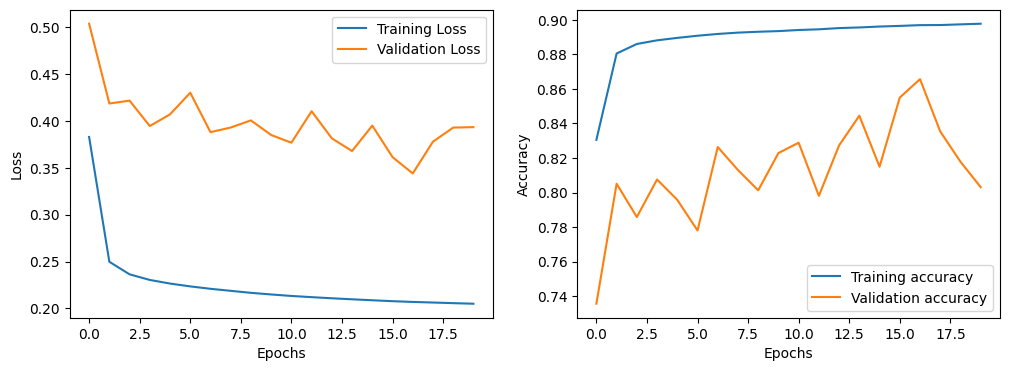

In [ ]:
plot_history(history_simple)